In [1]:
import plotly.express as px
import numpy as np
from tqdm import tqdm
import pandas as pd

from scipy.spatial import distance_matrix

from matplotlib import pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import os
from MPSE.MPSE import mview
from utils import *

%matplotlib inline

2021-12-09 19:58:14.326462: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/insane/.cache/pypoetry/virtualenvs/3d-reconstruction-GT1uMocM-py3.9/lib/python3.9/site-packages/cv2/../../lib64:
2021-12-09 19:58:14.326478: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


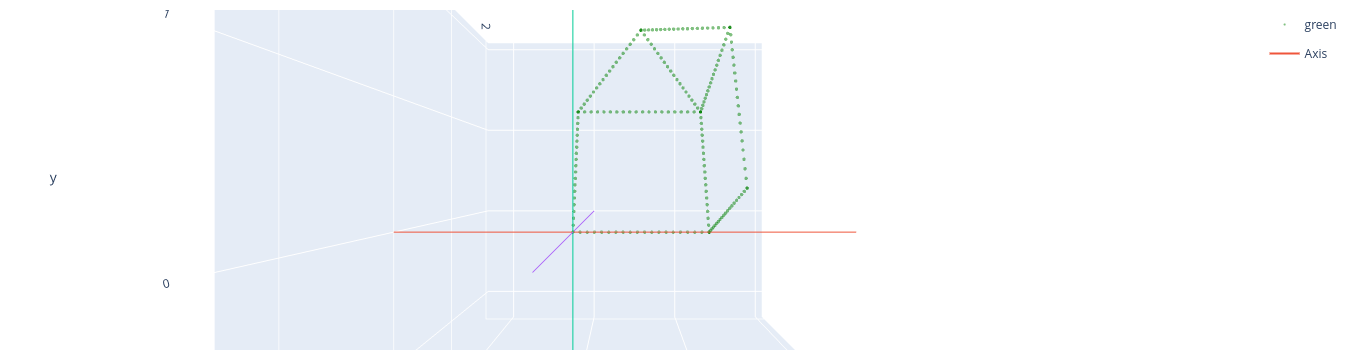

In [2]:
points = get_dataset_points('toy_points', 1024)
# points = get_dataset_points('ModelNet10:chair:0001', 1024)
plot_3D([points]).show()

In [3]:
labeled_perspectives = []
perspectives, projection_mats = get_randomized_all_persps(points, 12)
for perspective in perspectives:
    labeled_perspectives.append(give_ids(perspective))

proj = 'n_persp'
if proj == 'n_persp':
    labeled_perspectives = visible_in_n_persp(labeled_perspectives, 4)
elif proj == 'ray':
    labeled_perspectives = [
        ray_traceZ(p, n_raysX=80, n_raysY=80) for p in tqdm(labeled_perspectives)
    ]

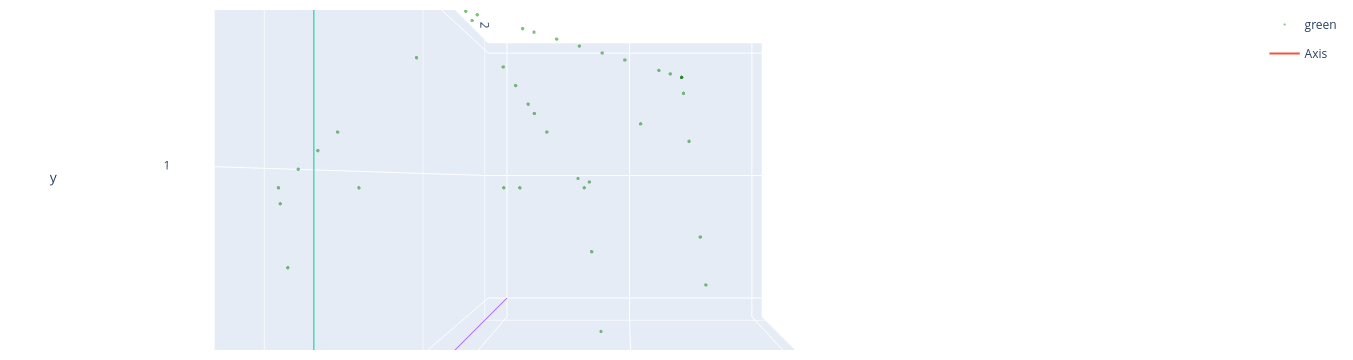

In [4]:
persp = remove_ids(labeled_perspectives[0])
plot_3D([add_col((persp))]).show()

12it [00:00, 123.13it/s]


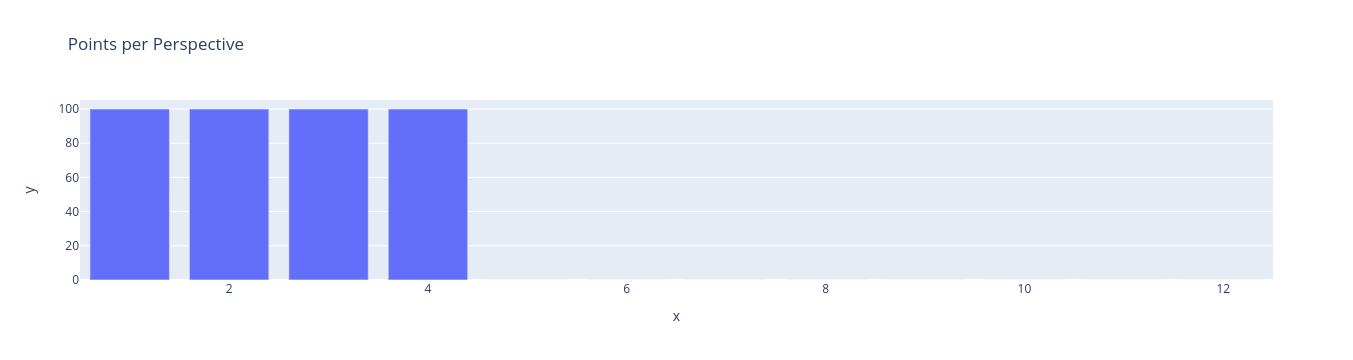

In [5]:
dist_mats, weights_mats = get_dist_weights(labeled_perspectives, len(points), ndim=2)

points_per_persp = np.array(show_points_least_persp(weights_mats))
points_per_persp = points_per_persp/points_per_persp.max() * 100

fig = px.bar(points_per_persp, x=range(1, len(points_per_persp)+1), y=points_per_persp, title="Points per Perspective")
fig.show()

mview.MPSE():
  data details:
    number of perspectives : 12
    number of samples : 200
  visualization details:
    embedding dimension : 3
    image dimension : 2
    visualization type : mds
  setup visualization instance for perspective 1 :
    mview.MDS():
      data details:
        number of samples : 200
        weighted : True
      embedding details:
        embedding dimension : 2
    initial embedding : random
    initial stress : 6.07e-01
  setup visualization instance for perspective 2 :
    mview.MDS():
      data details:
        number of samples : 200
        weighted : True
      embedding details:
        embedding dimension : 2
    initial embedding : random
    initial stress : 6.13e-01
  setup visualization instance for perspective 3 :
    mview.MDS():
      data details:
        number of samples : 200
        weighted : True
      embedding details:
        embedding dimension : 2
    initial embedding : random
    initial stress : 6.03e-01
  setup visualizat

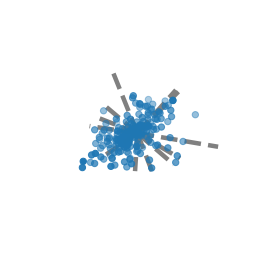

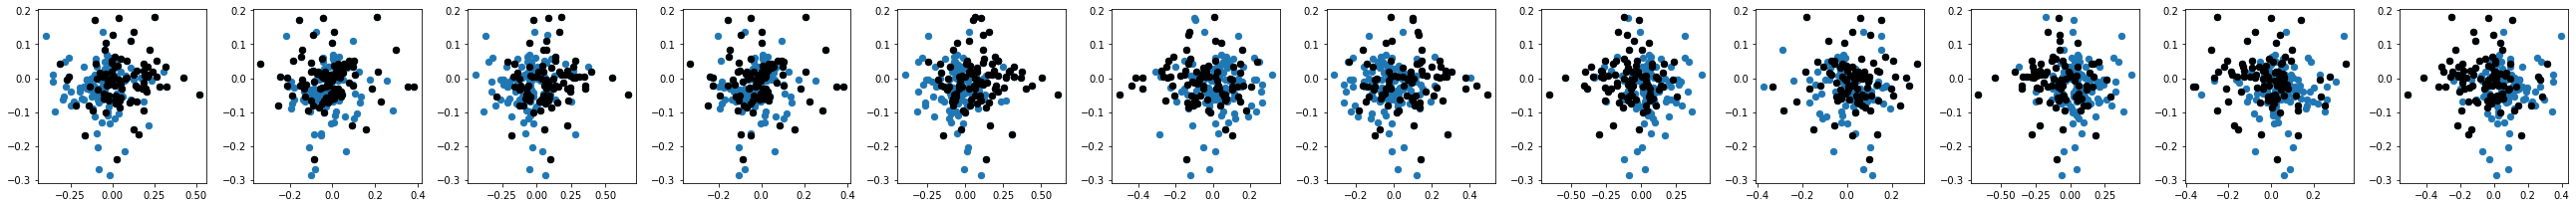

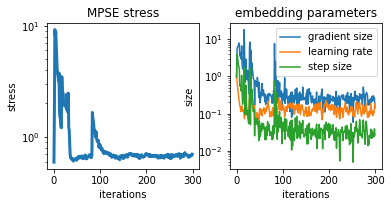

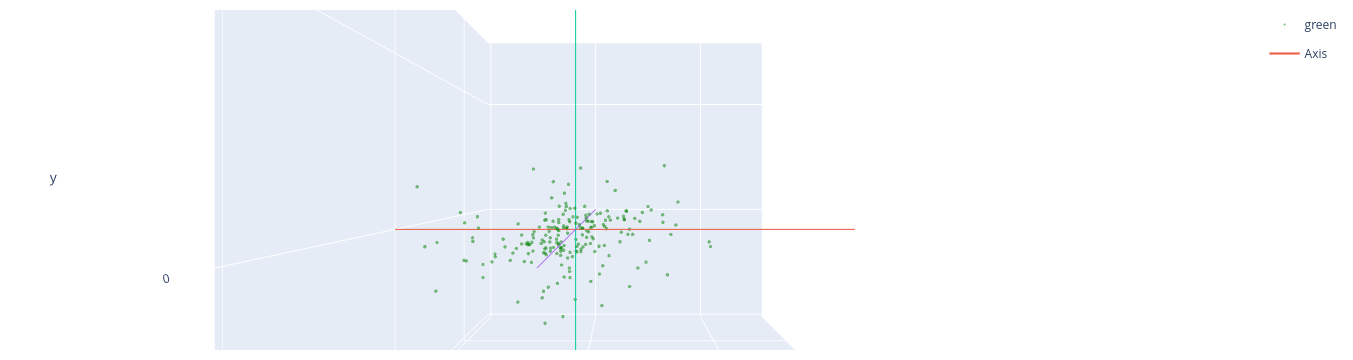

In [6]:
mv = mview.basic(dist_mats.copy(), #
                 batch_size = 16,
                 max_iter=300, min_grad=1e-10, min_cost=1e-9,
                 verbose=2, 
                 smart_initialization=False,
                 weights=weights_mats.copy(),
                 
                 # For fixed projections
                 fixed_projections = projection_mats,
                 
                 # For variable projections
#                  fixed_projections = None,
#                  initial_projections = 'cylinder'
                )

emb_plot = mv.plot_embedding()
imgs_plot = mv.plot_images()
comp_plot = mv.plot_computations()

plt.show()

embeddings = mv.X.copy()
plot_3D([embeddings]).show()

mview.MPSE():
  data details:
    number of perspectives : 12
    number of samples : 200
  visualization details:
    embedding dimension : 3
    image dimension : 2
    visualization type : mds
  setup visualization instance for perspective 1 :
    mview.MDS():
      data details:
        number of samples : 200
        weighted : True
      embedding details:
        embedding dimension : 2
    initial embedding : random
    initial stress : 6.09e-01
  setup visualization instance for perspective 2 :
    mview.MDS():
      data details:
        number of samples : 200
        weighted : True
      embedding details:
        embedding dimension : 2
    initial embedding : random
    initial stress : 5.90e-01
  setup visualization instance for perspective 3 :
    mview.MDS():
      data details:
        number of samples : 200
        weighted : True
      embedding details:
        embedding dimension : 2
    initial embedding : random
    initial stress : 5.88e-01
  setup visualizat

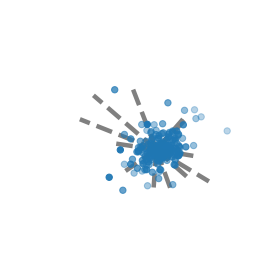

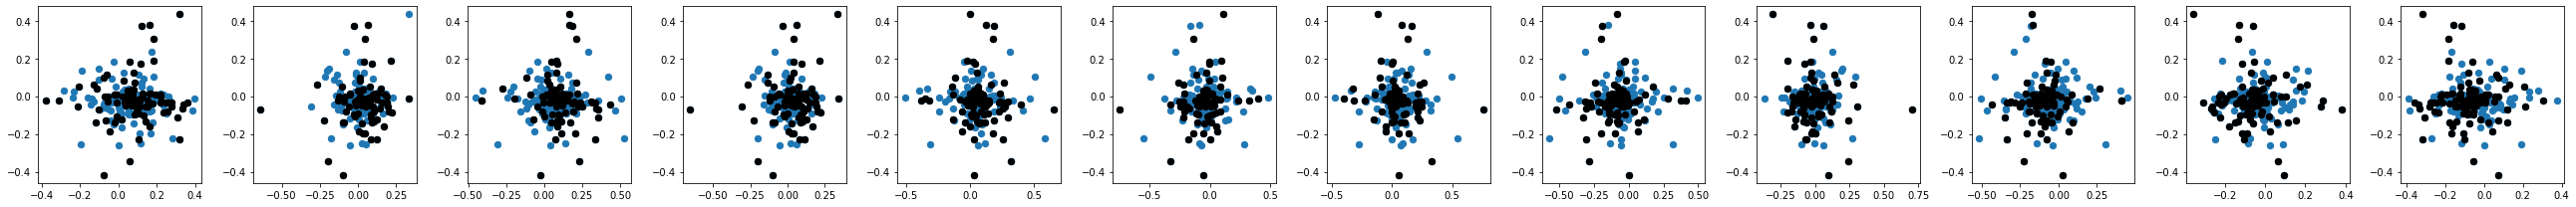

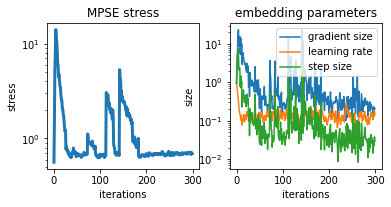

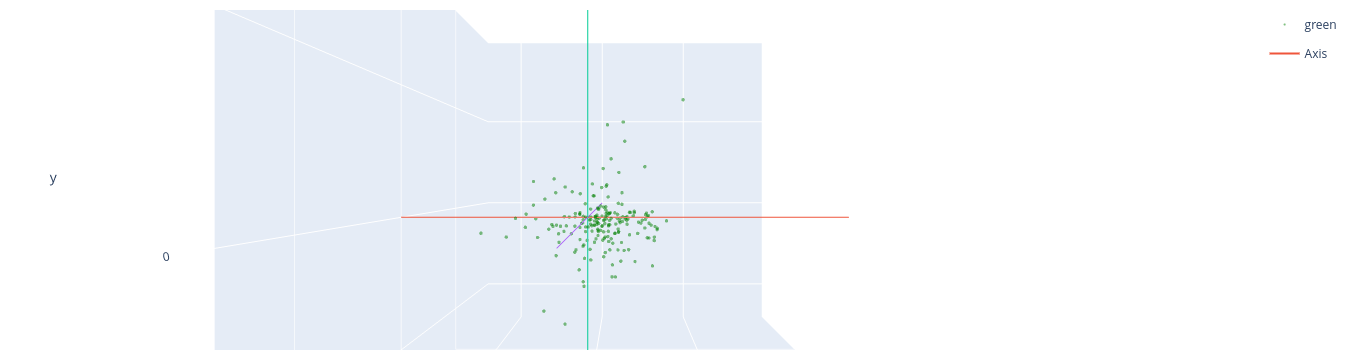

In [7]:
mv = mview.basic(dist_mats.copy(), #
                 batch_size = 16,
                 max_iter=300, min_grad=1e-10, min_cost=1e-9,
                 verbose=2, 
                 smart_initialization=False,
                 weights=weights_mats.copy(),
                 
                 # For fixed projections
                 fixed_projections = projection_mats,
                 
                 # For variable projections
#                  fixed_projections = None,
#                  initial_projections = 'cylinder'
                )

emb_plot = mv.plot_embedding()
imgs_plot = mv.plot_images()
comp_plot = mv.plot_computations()

plt.show()

embeddings = mv.X.copy()
plot_3D([embeddings]).show()

mview.MPSE():
  data details:
    number of perspectives : 12
    number of samples : 200
  visualization details:
    embedding dimension : 3
    image dimension : 2
    visualization type : mds
  setup visualization instance for perspective 1 :
    mview.MDS():
      data details:
        number of samples : 200
        weighted : True
      embedding details:
        embedding dimension : 2
    initial embedding : random
    initial stress : 5.86e-01
  setup visualization instance for perspective 2 :
    mview.MDS():
      data details:
        number of samples : 200
        weighted : True
      embedding details:
        embedding dimension : 2
    initial embedding : random
    initial stress : 6.19e-01
  setup visualization instance for perspective 3 :
    mview.MDS():
      data details:
        number of samples : 200
        weighted : True
      embedding details:
        embedding dimension : 2
    initial embedding : random
    initial stress : 5.93e-01
  setup visualizat

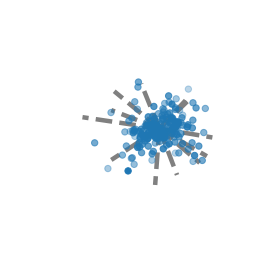

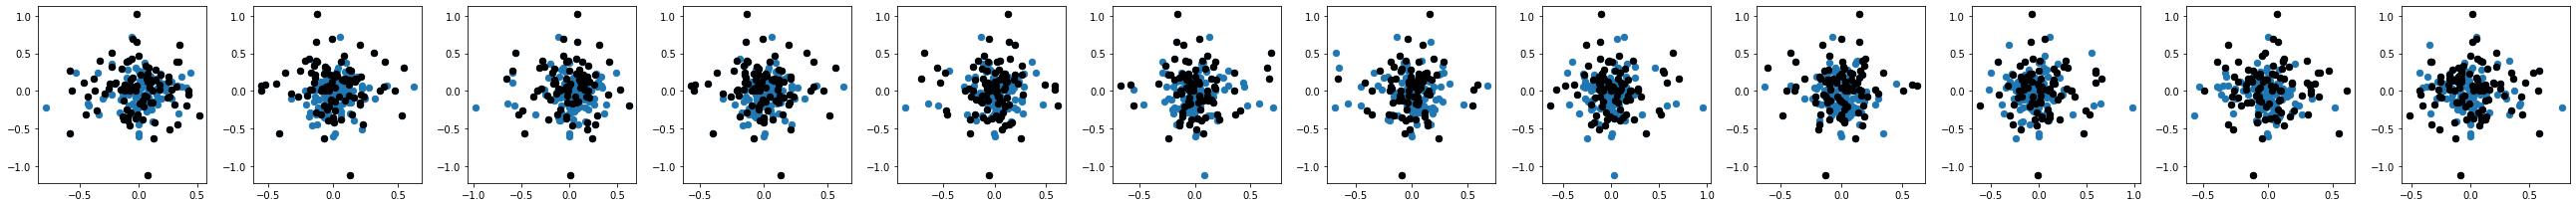

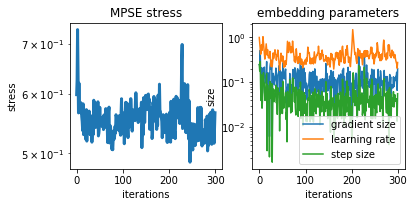

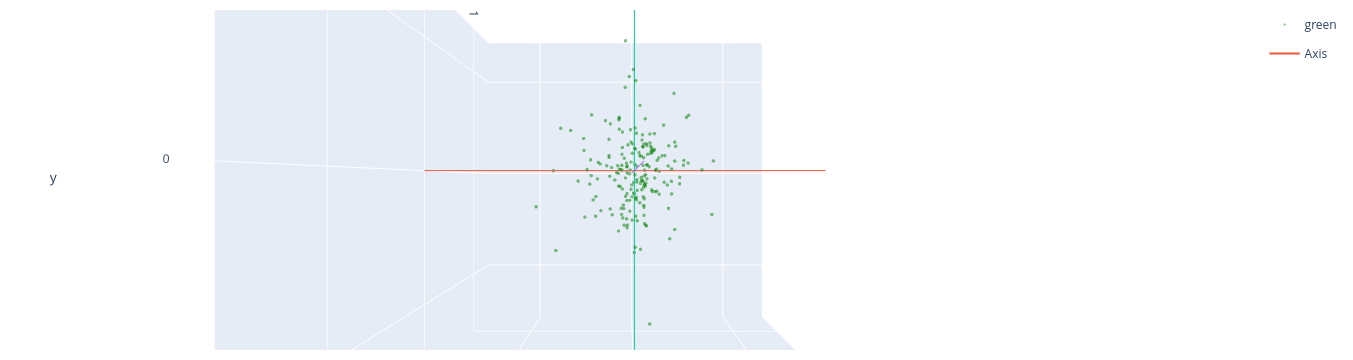

In [8]:
mv = mview.basic(dist_mats.copy(), #
                 batch_size = 64,
                 max_iter=300, min_grad=1e-10, min_cost=1e-9,
                 verbose=2, 
                 smart_initialization=False,
                 weights=weights_mats.copy(),
                 
                 # For fixed projections
                 fixed_projections = projection_mats,
                 
                 # For variable projections
#                  fixed_projections = None,
#                  initial_projections = 'cylinder'
                )

emb_plot = mv.plot_embedding()
imgs_plot = mv.plot_images()
comp_plot = mv.plot_computations()

plt.show()

embeddings = mv.X.copy()
plot_3D([embeddings]).show()

mview.MPSE():
  data details:
    number of perspectives : 12
    number of samples : 200
  visualization details:
    embedding dimension : 3
    image dimension : 2
    visualization type : mds
  setup visualization instance for perspective 1 :
    mview.MDS():
      data details:
        number of samples : 200
        weighted : True
      embedding details:
        embedding dimension : 2
    initial embedding : random
    initial stress : 6.16e-01
  setup visualization instance for perspective 2 :
    mview.MDS():
      data details:
        number of samples : 200
        weighted : True
      embedding details:
        embedding dimension : 2
    initial embedding : random
    initial stress : 6.11e-01
  setup visualization instance for perspective 3 :
    mview.MDS():
      data details:
        number of samples : 200
        weighted : True
      embedding details:
        embedding dimension : 2
    initial embedding : random
    initial stress : 6.04e-01
  setup visualizat

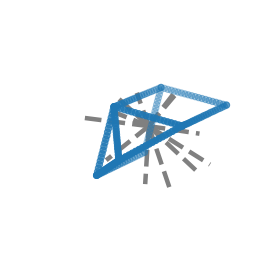

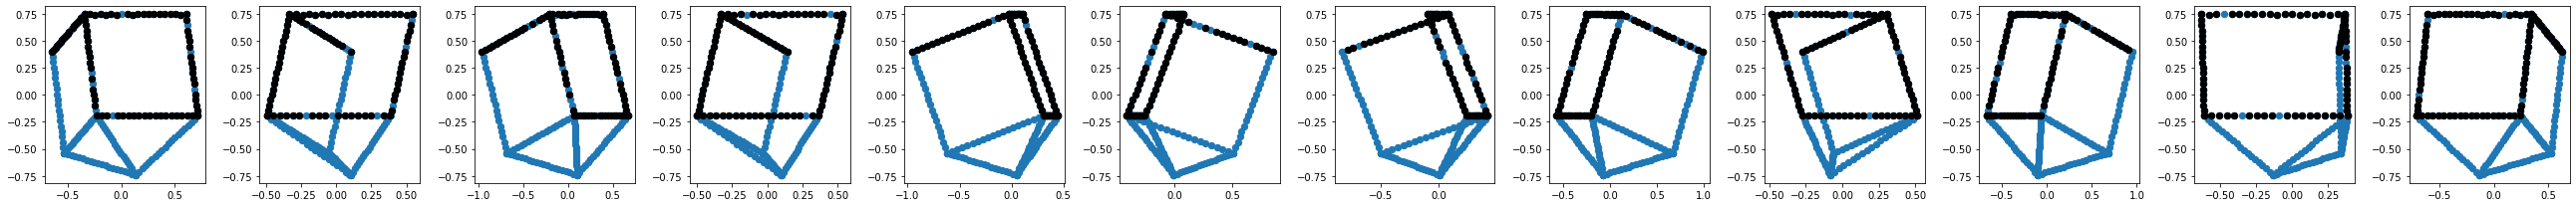

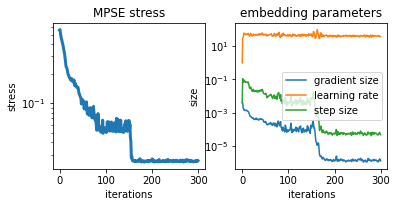

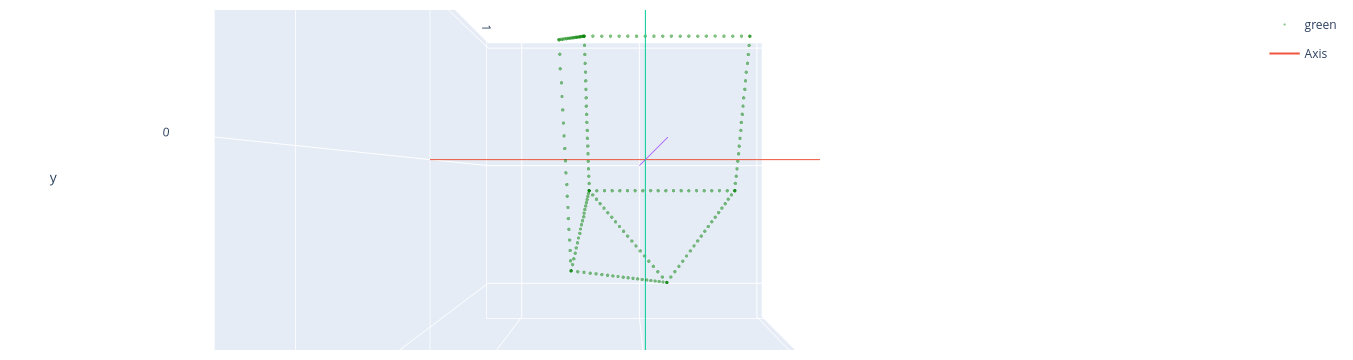

In [9]:
mv = mview.basic(dist_mats.copy(), #
                 batch_size = 128,
                 max_iter=300, min_grad=1e-10, min_cost=1e-9,
                 verbose=2, 
                 smart_initialization=False,
                 weights=weights_mats.copy(),
                 
                 # For fixed projections
                 fixed_projections = projection_mats,
                 
                 # For variable projections
#                  fixed_projections = None,
#                  initial_projections = 'cylinder'
                )

emb_plot = mv.plot_embedding()
imgs_plot = mv.plot_images()
comp_plot = mv.plot_computations()

plt.show()

embeddings = mv.X.copy()
plot_3D([embeddings]).show()

mview.MPSE():
  data details:
    number of perspectives : 12
    number of samples : 200
  visualization details:
    embedding dimension : 3
    image dimension : 2
    visualization type : mds
  setup visualization instance for perspective 1 :
    mview.MDS():
      data details:
        number of samples : 200
        weighted : True
      embedding details:
        embedding dimension : 2
    initial embedding : random
    initial stress : 5.94e-01
  setup visualization instance for perspective 2 :
    mview.MDS():
      data details:
        number of samples : 200
        weighted : True
      embedding details:
        embedding dimension : 2
    initial embedding : random
    initial stress : 5.91e-01
  setup visualization instance for perspective 3 :
    mview.MDS():
      data details:
        number of samples : 200
        weighted : True
      embedding details:
        embedding dimension : 2
    initial embedding : random
    initial stress : 5.66e-01
  setup visualizat

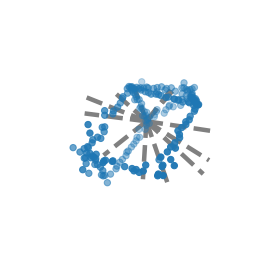

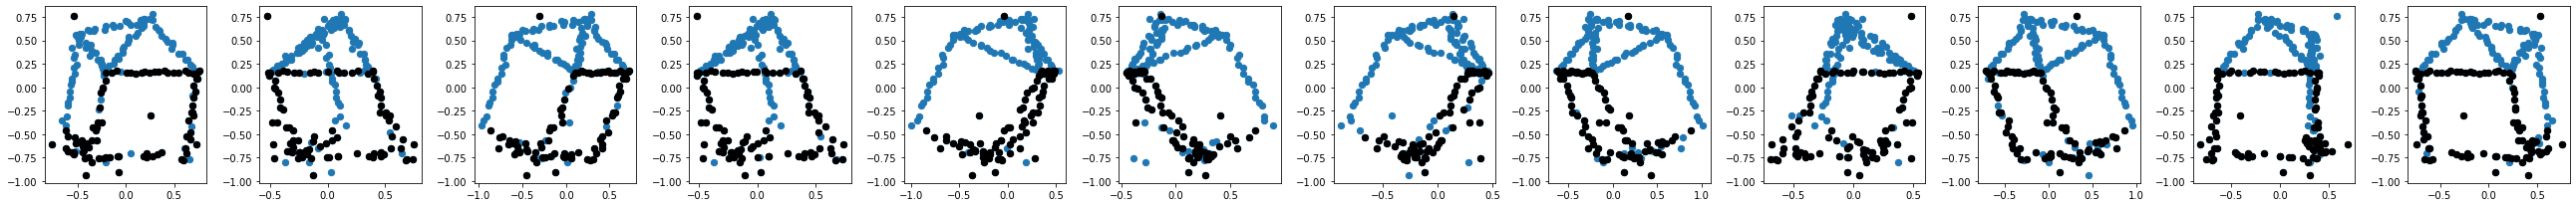

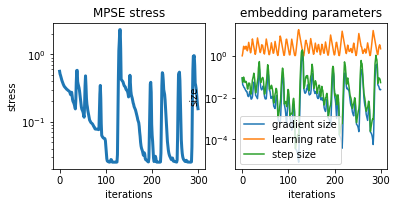

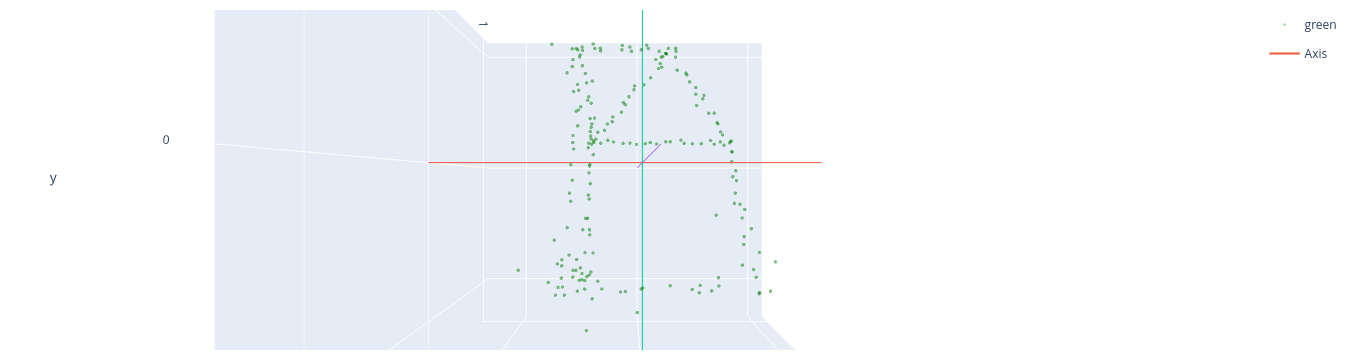

In [10]:
mv = mview.basic(dist_mats.copy(), #
                 batch_size = 256,
                 max_iter=300, min_grad=1e-10, min_cost=1e-9,
                 verbose=2, 
                 smart_initialization=False,
                 weights=weights_mats.copy(),
                 
                 # For fixed projections
                 fixed_projections = projection_mats,
                 
                 # For variable projections
#                  fixed_projections = None,
#                  initial_projections = 'cylinder'
                )

emb_plot = mv.plot_embedding()
imgs_plot = mv.plot_images()
comp_plot = mv.plot_computations()

plt.show()

embeddings = mv.X.copy()
plot_3D([embeddings]).show()